In [53]:
import numpy as np 
import pandas as pd
import datetime as DT

import calendar
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Cargamos los dataframes con los CSVs de Navent

fiuba1 = pd.read_csv('../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero = pd.read_csv('../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('../datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('../datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('../datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('../datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [3]:
#Realizamos un head para analizar las columnas existentes
fiuba1.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
postulantes_genero.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
vistas.head()


,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [5]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [7]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [107]:
#Mergeamos los 2 primeros dataframes para obtener una descripcion mas detallada de cada postulante al aviso

datos_postulantes = pd.merge(fiuba1, postulantes_genero, on='idpostulante')

datos_postulantes.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


In [9]:
#Mergeamos ahora con el aviso en el cual se postulo

postulaciones_con_datos_postulantes = pd.merge(postulaciones, datos_postulantes, on='idpostulante')

postulaciones_con_datos_postulantes.head()

,idaviso,idpostulante,fechapostulacion,nombre,estado,fechanacimiento,sexo
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM
1,1111920714,NM5M,2018-02-06 09:04:50,Secundario,Graduado,1970-12-03,FEM
2,1112346945,NM5M,2018-02-22 09:04:47,Secundario,Graduado,1970-12-03,FEM
3,1112345547,NM5M,2018-02-22 09:04:59,Secundario,Graduado,1970-12-03,FEM
4,1112237522,5awk,2018-01-25 18:55:03,Universitario,Graduado,1962-12-04,FEM


In [10]:
#Mergeamos por el idaviso para obtener una descripcion de cada postulante a que se postulo

datos_avisos_con_postulantes = pd.merge(postulaciones_con_datos_postulantes, avisos_detalle, on = 'idaviso')

datos_avisos_con_postulantes.head()

,idaviso,idpostulante,fechapostulacion,nombre,estado,fechanacimiento,sexo,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,2018-01-15 10:23:11,Universitario,En Curso,1984-04-21,FEM,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,1kJqGb,2018-01-15 10:23:11,Terciario/Técnico,Graduado,1984-04-21,FEM,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,eOE9Rr,2018-01-15 10:42:07,Secundario,Graduado,1979-03-05,FEM,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,eOE9Rr,2018-01-15 10:42:07,Universitario,Abandonado,1979-03-05,FEM,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


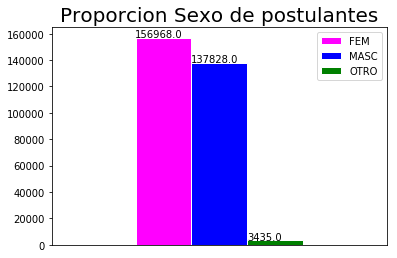

In [11]:
#Graficamos genero de postulantes


cantidad_masculinos=datos_postulantes.loc[datos_postulantes.sexo.str.contains('MASC'),:]
cantidad_femeninos=datos_postulantes.loc[datos_postulantes.sexo.str.contains('FEM'),:]
cantidad_otro=datos_postulantes.loc[datos_postulantes.sexo.str.contains('NO_DECLARA'),:]
sizes = {'MASC': [len(cantidad_masculinos)], 'FEM': [len(cantidad_femeninos)], 'OTRO': [len(cantidad_otro)]}
df = pd.DataFrame(sizes)

ax= df.plot.bar(colors=['Magenta','Blue','Green'],ec='White', title='Proporcion Sexo de postulantes')
ax.xaxis.set_visible(False)
ax.title.set_fontsize(20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

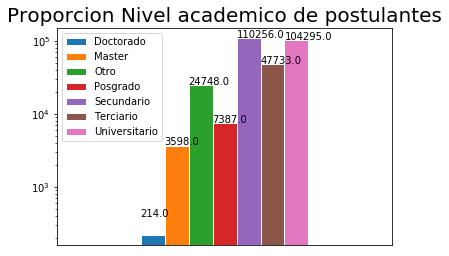

In [12]:
#Graficos la proporcion de nivel academico

cantidad_posgrado=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Posgrado'),:]
cantidad_universitario=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Universitario'),:]
cantidad_master=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Master'),:]
cantidad_otro=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Otro'),:]
cantidad_terciario=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Terciario/T\xc3\xa9cnico'),:]
cantidad_secundario=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Secundario'),:]
cantidad_doctorado=datos_postulantes.loc[datos_postulantes.nombre.str.contains('Doctorado'),:]
sizes = {'Posgrado':[len(cantidad_posgrado)], 'Universitario':[len(cantidad_universitario)], 'Master': [len(cantidad_master)], 'Otro':[len(cantidad_otro)], 'Terciario':[len(cantidad_terciario)], 'Secundario': [len(cantidad_secundario)], 'Doctorado': [len(cantidad_doctorado)]}


df = pd.DataFrame(sizes)

ax= df.plot.bar(ec='White', title='Proporcion Nivel academico de postulantes',logy=True)
ax.xaxis.set_visible(False)
ax.title.set_fontsize(20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() + 175))

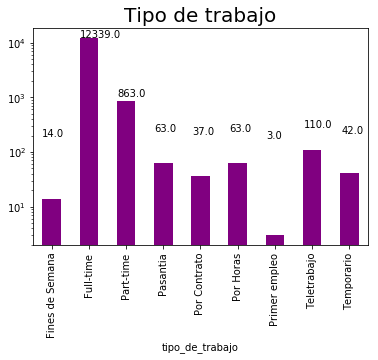

In [13]:
#Tipo de trabajo de publicaciones de avisos

ax= avisos_detalle.groupby(['tipo_de_trabajo']).count()['idaviso'].plot.bar(color='purple', title='Tipo de trabajo', logy = True)

ax.title.set_fontsize(20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() + 175))

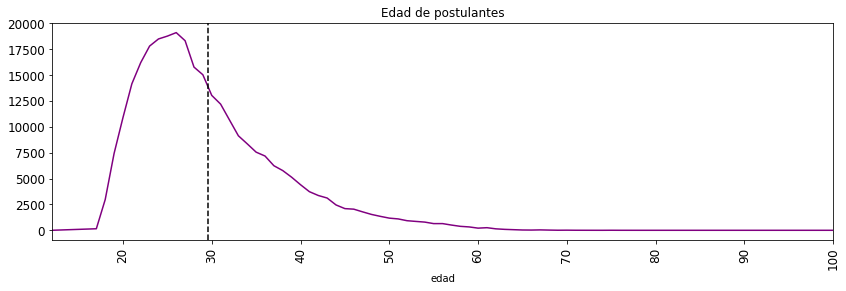

In [143]:
#Grafico con edad de los postulantes

datos_postulantes['fechanacimiento'] =  pd.to_datetime(datos_postulantes['fechanacimiento'],errors = 'coerce')

now = pd.Timestamp(DT.datetime.now())

datos_postulantes['edad'] = (now - datos_postulantes['fechanacimiento']).astype('<m8[Y]')

datos_postulantes['edad'] = datos_postulantes['edad'].fillna(0.0).astype(int)

datos_postulantes = datos_postulantes.drop(datos_postulantes[datos_postulantes.edad < 0.1].index)

datos_postulantes = datos_postulantes.drop(datos_postulantes[datos_postulantes.edad > 100].index)


ax = datos_postulantes.groupby(['edad']).count()['idpostulante'].plot(kind='line', rot = 90, figsize=(14,4), color='purple' ,fontsize=12, title='Edad de postulantes')

edad_promedio = datos_postulantes['edad'].mean()

ax.axvline(edad_promedio, color='k', linestyle='--')


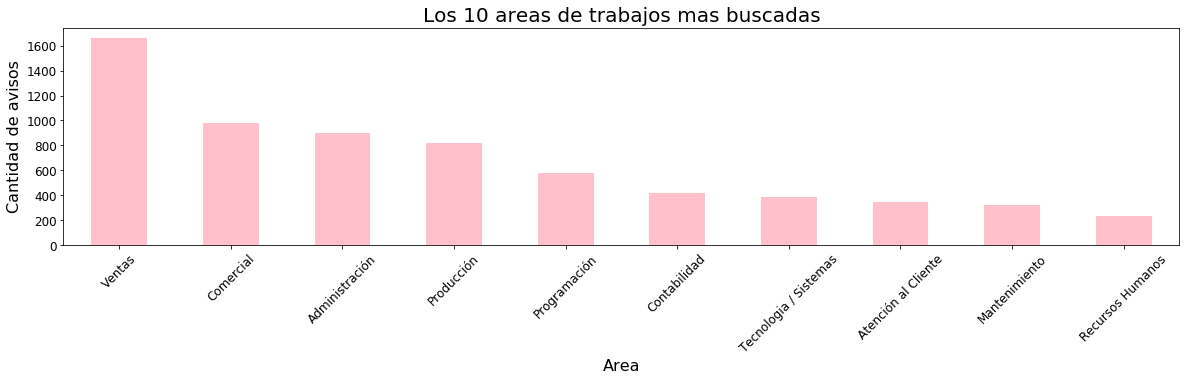

In [163]:
# Detalle trabajo por area

top10_area_trabajo = avisos_detalle.groupby('nombre_area').count()['idaviso'].sort_values(ascending=False)[0:10]

top10_area_trabajo.plot(kind='bar',rot=45, figsize=(20,4), color='pink' ,fontsize=12)

plt.title('Los 10 areas de trabajos mas buscadas', fontsize=20);
plt.xlabel('Area', fontsize=16);
plt.ylabel('Cantidad de avisos', fontsize=16)